<a href="https://colab.research.google.com/github/aravint-annamalai/PyTorch/blob/main/Training_a_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

In [5]:
trainloader

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

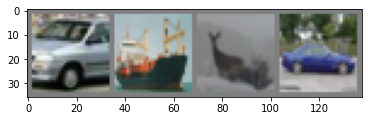

  car  ship  deer   car


In [7]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss:%.3f'% (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print('Finished training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss:2.240
[1,  4000] loss:1.899
[1,  6000] loss:1.666
[1,  8000] loss:1.553
[1, 10000] loss:1.503
[1, 12000] loss:1.455
[2,  2000] loss:1.386
[2,  4000] loss:1.375
[2,  6000] loss:1.342
[2,  8000] loss:1.312
[2, 10000] loss:1.289
[2, 12000] loss:1.285
Finished training


In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

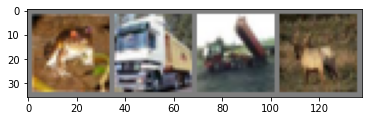

GroundTruth:   frog truck truck  deer


In [13]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog truck truck  deer


In [19]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)

    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 57 %


In [20]:
correct_pred = {classname:0 for classname in classes}
total_pred = {classname:0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs,1)

    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

In [21]:
correct_pred

{'bird': 2007,
 'car': 3917,
 'cat': 1356,
 'deer': 2500,
 'dog': 3166,
 'frog': 3002,
 'horse': 3473,
 'plane': 2366,
 'ship': 4023,
 'truck': 3010}

In [23]:
for classname,correct_count in correct_pred.items():
  accuracy = 100*float(correct_count)/total_pred[classname]
  print(f"Accuracy for class {classname} is {accuracy}%")

Accuracy for class plane is 47.32%
Accuracy for class car is 78.34%
Accuracy for class bird is 40.14%
Accuracy for class cat is 27.12%
Accuracy for class deer is 50.0%
Accuracy for class dog is 63.32%
Accuracy for class frog is 60.04%
Accuracy for class horse is 69.46%
Accuracy for class ship is 80.46%
Accuracy for class truck is 60.2%
